In [3]:
from google.colab import files
uploaded = files.upload()



Saving fear_greed_index.csv to fear_greed_index.csv
Saving historical_data.csv to historical_data.csv


In [4]:
import pandas as pd

# Load the data
trader_df = pd.read_csv('historical_data.csv')
sentiment_df = pd.read_csv('fear_greed_index.csv')

# Preview the data
print("📊 Trader Data")
print(trader_df.head(), "\n")

print("📈 Sentiment Data")
print(sentiment_df.head())


📊 Trader Data
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0        

In [5]:
# Convert Trader Timestamp (string format) to datetime
trader_df['Date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date


In [6]:
# Convert 'date' column to proper date format
sentiment_df['Date'] = pd.to_datetime(sentiment_df['date']).dt.date


In [7]:
# Merge both datasets on the 'Date' column
merged_df = pd.merge(trader_df, sentiment_df[['Date', 'classification']], on='Date', how='left')

# Preview merged data
merged_df[['Date', 'Closed PnL', 'classification']].head()


,Date,Closed PnL,classification
0,2024-12-02,0.0,Extreme Greed
1,2024-12-02,0.0,Extreme Greed
2,2024-12-02,0.0,Extreme Greed
3,2024-12-02,0.0,Extreme Greed
4,2024-12-02,0.0,Extreme Greed


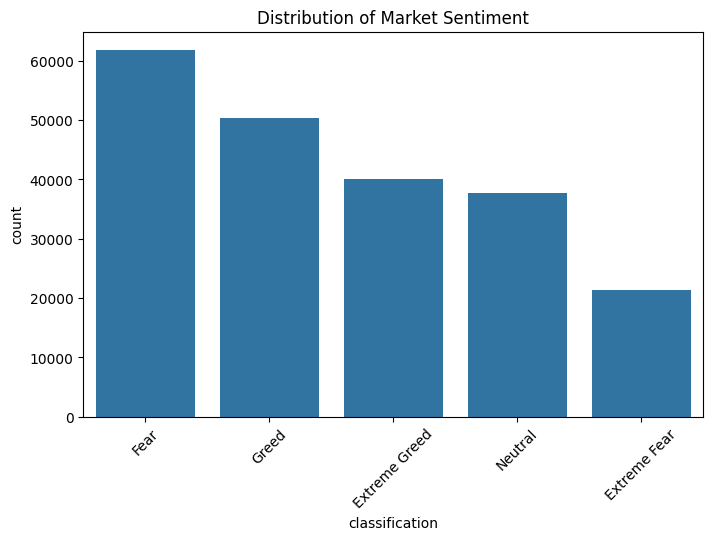

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment distribution
plt.figure(figsize=(8,5))
sns.countplot(data=merged_df, x='classification', order=merged_df['classification'].value_counts().index)
plt.title('Distribution of Market Sentiment')
plt.xticks(rotation=45)
plt.show()


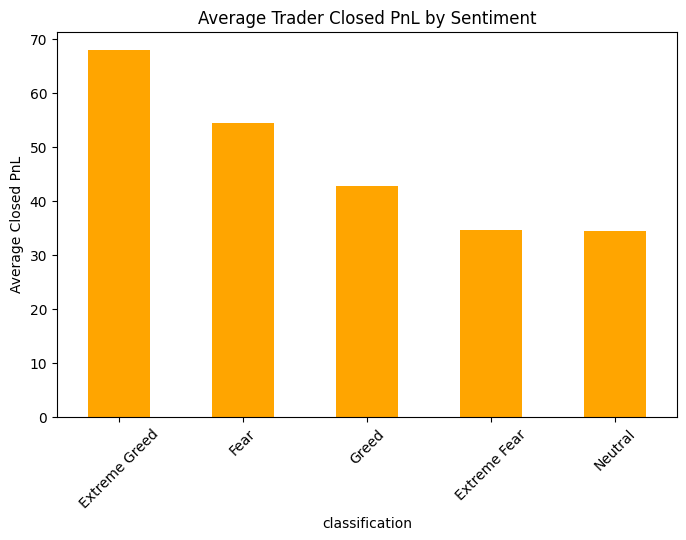

In [9]:
# Average Closed PnL per sentiment
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
avg_pnl.plot(kind='bar', color='orange')
plt.title('Average Trader Closed PnL by Sentiment')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45)
plt.show()


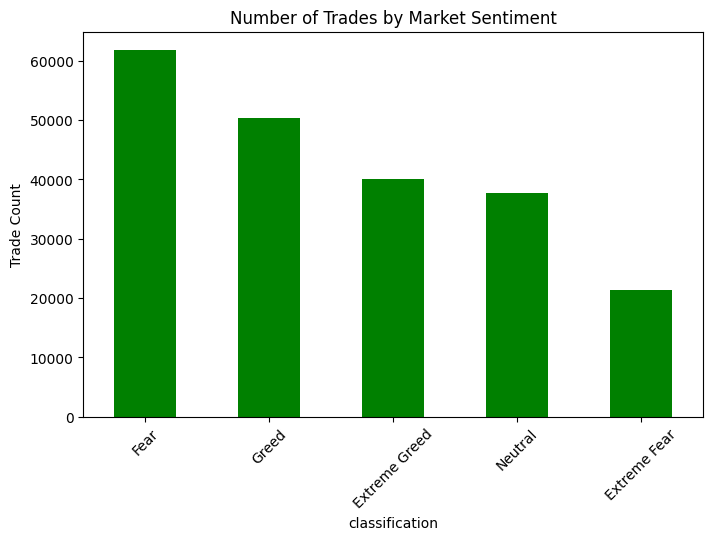

In [14]:
trades_per_sentiment = merged_df['classification'].value_counts()

plt.figure(figsize=(8,5))
trades_per_sentiment.plot(kind='bar', color='Green')
plt.title('Number of Trades by Market Sentiment')
plt.ylabel('Trade Count')
plt.xticks(rotation=45)
plt.show()


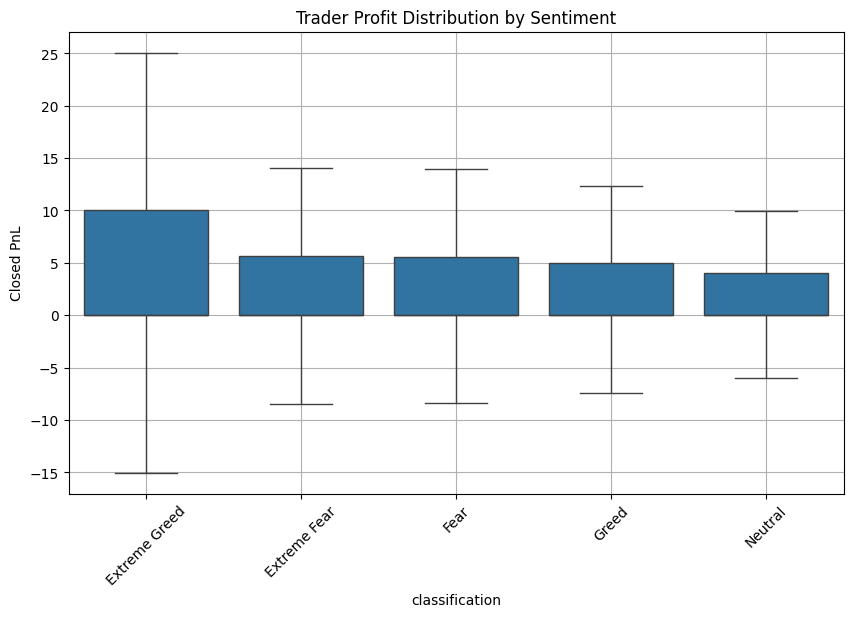

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL', showfliers=False)
plt.title('Trader Profit Distribution by Sentiment')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [12]:
print(merged_df.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'Date', 'classification'],
      dtype='object')
